# Task
You are given the data for years 2015 and 2019 from World Happiness Report which includes
various socio-economic and well-being indicators that help measure the happiness level of countries.
Below is a brief description of its key features:
Task

1. Perform Exploratory Data Analysis (EDA) to understand patterns and detect anomalies.
2. Outlier Detection and Removal (if required) by identifying and handling numerical outliers.
3. Feature Scaling and Transformation through normalization or standardization for
consistency.
4. Clustering Model Development by implementing K-Means clustering for 2015 and 2019
and optimizing hyperparameters.
5. Cluster Evaluation using suitable metrics to assess clustering performance.
6. Model Drift Analysis by comparing clusters across different years to detect structural
changes.
a. Measure centroid shifts and cluster membership changes over time.
b. Use Kullback-Leibler (KL) Divergence or other suitable metrics to quantify drift.
7. Visualization of Results using PCA for dimensionality reduction and plotting cluster
changes over time.
8. Conclusion and Insights by summarizing findings, explaining cluster variations, and
linking them to socio-economic trends.

Here is all the data you need:
"2019.csv"
"2015.csv"

## Data loading

### Subtask:
Load the two CSV files containing the World Happiness Report data for 2015 and 2019 into pandas DataFrames.


**Reasoning**:
Load the two csv files into pandas dataframes.



In [284]:
import pandas as pd

df_2015 = pd.read_csv('2015.csv')
df_2019 = pd.read_csv('2019.csv')

In [234]:
display(df_2015.head())

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [235]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [236]:
display(df_2019.head())

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [237]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


## Data exploration

### Subtask:
Explore the loaded datasets (df_2015 and df_2019) to understand their structure, identify potential issues, and gain initial insights.


**Reasoning**:
Examine the shape, data types, descriptive statistics, and missing values of the dataframes. Also, analyze the distributions of key variables.



In [238]:
# Examine the shape of each DataFrame
print("Shape of df_2015:", df_2015.shape)
print("Shape of df_2019:", df_2019.shape)

Shape of df_2015: (158, 12)
Shape of df_2019: (156, 9)


In [239]:
# Check data types and descriptive statistics
print("\nInfo for df_2015:")
display(df_2015.info())


Info for df_2015:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object

None

In [240]:
print("\nDescribe for df_2015:")
display(df_2015.describe())


Describe for df_2015:


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [241]:
print("\nInfo for df_2019:")
display(df_2019.info())



Info for df_2019:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


None

In [242]:
print("\nDescribe for df_2019:")
display(df_2019.describe())


Describe for df_2019:


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


- Same core features are available in both datasets — but column names are slightly different.

- 2015 has some extra features like Standard Error and Dystopia Residual which are not in 2019.

- For clustering, we should standardize both datasets to have matching feature sets:

  - GDP per capita

  - Social support

  - Healthy life expectancy

  - Freedom to make life choices

  - Generosity

  - Perceptions of corruption

Standard Error and Dystopia Residual are time-independent variables. Standard Error measures sampling uncertainty, while Dystopia Residual is a model-based construct recalculated each year. Generating their values for 2019 is unnecessary, as they do not reflect real socio-economic changes and are excluded from clustering.

In [243]:
# Identify missing values
print("\nMissing values in df_2015:")
display(df_2015.isnull().sum())


Missing values in df_2015:


,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Standard Error,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0


In [244]:
print("\nMissing values in df_2019:")
display(df_2019.isnull().sum())


Missing values in df_2019:


,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


No Missing values

In [245]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Rename columns for alignment
df_2015_renamed = df_2015.rename(columns={
    'Country': 'Country or region',
    'Economy (GDP per Capita)': 'GDP per capita',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Happiness Score': 'Score'
})

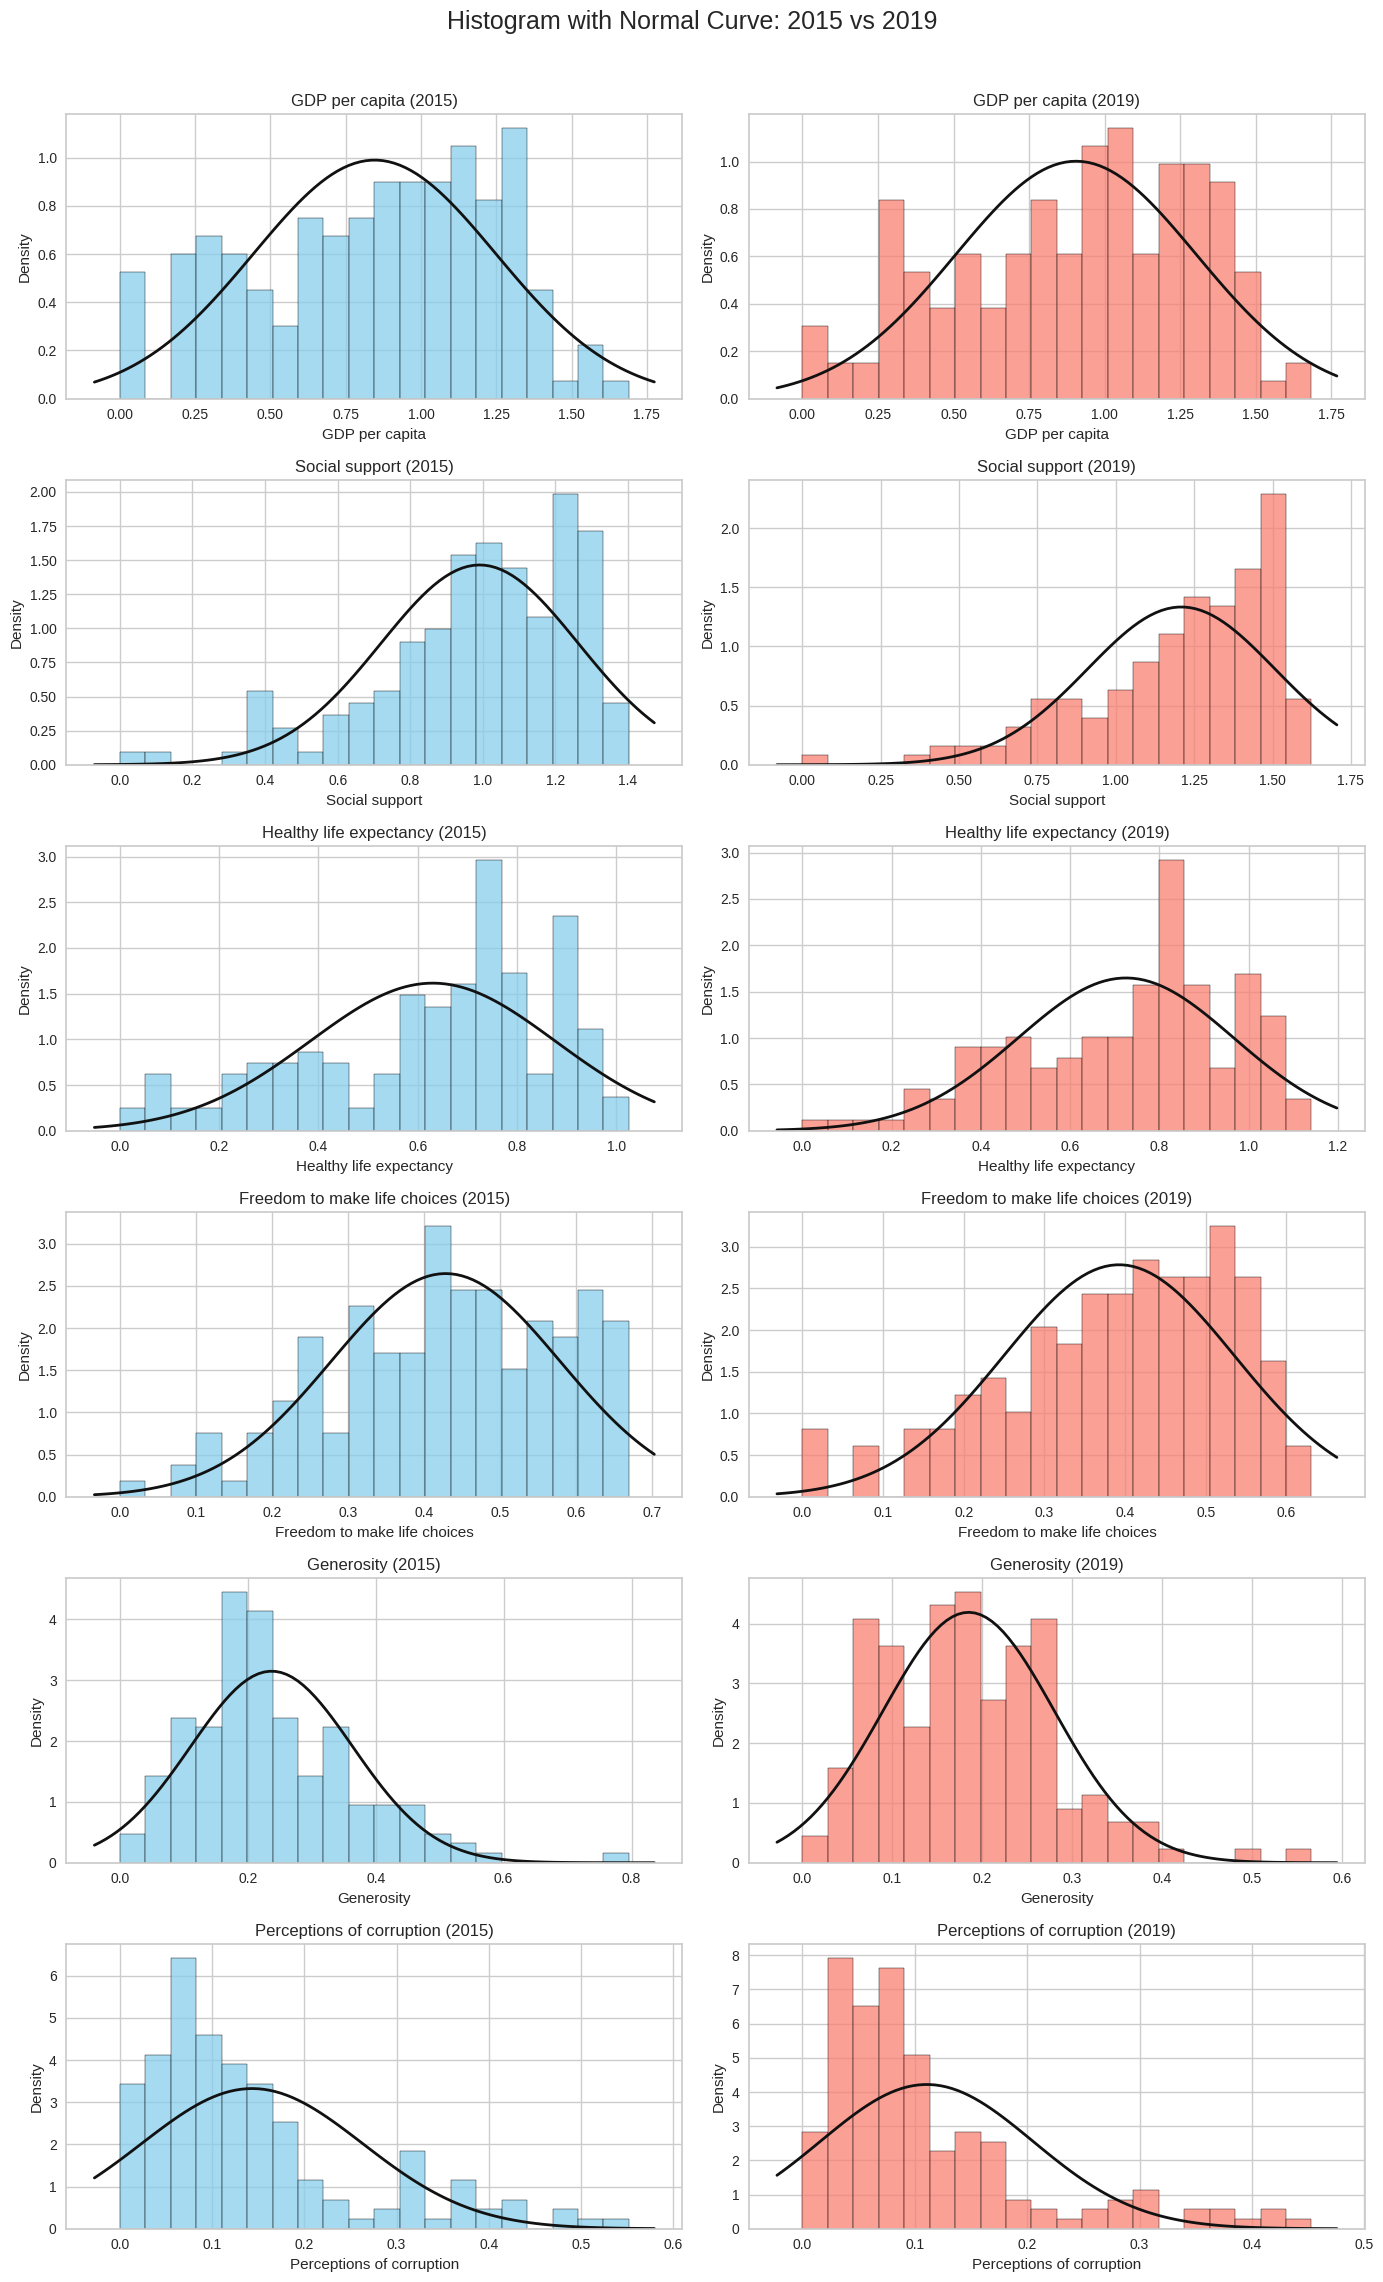

In [246]:
import numpy as np

# Set plot layout
fig, axes = plt.subplots(len(features), 2, figsize=(14, 24))
fig.suptitle('Histogram with Normal Curve: 2015 vs 2019', fontsize=18)

# Plot
for idx, feature in enumerate(features):
    # 2015
    ax = axes[idx, 0]
    sns.histplot(df_2015_selected[feature], kde=False, stat="density", color='skyblue', edgecolor='black', ax=ax, bins=20)

    # Fit normal curve
    mu_2015, std_2015 = df_2015_selected[feature].mean(), df_2015_selected[feature].std()
    xmin, xmax = ax.get_xlim()
    x = pd.Series(np.linspace(xmin, xmax, 100))
    p = norm.pdf(x, mu_2015, std_2015)
    ax.plot(x, p, 'k', linewidth=2)

    ax.set_title(f"{feature} (2015)")

    # 2019
    ax = axes[idx, 1]
    sns.histplot(df_2019_selected[feature], kde=False, stat="density", color='salmon', edgecolor='black', ax=ax, bins=20)

    # Fit normal curve
    mu_2019, std_2019 = df_2019_selected[feature].mean(), df_2019_selected[feature].std()
    xmin, xmax = ax.get_xlim()
    x = pd.Series(np.linspace(xmin, xmax, 100))
    p = norm.pdf(x, mu_2019, std_2019)
    ax.plot(x, p, 'k', linewidth=2)

    ax.set_title(f"{feature} (2019)")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


In [247]:
# Select only the relevant columns
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

df_2015_selected = df_2015_renamed[features]
df_2019_selected = df_2019[features]

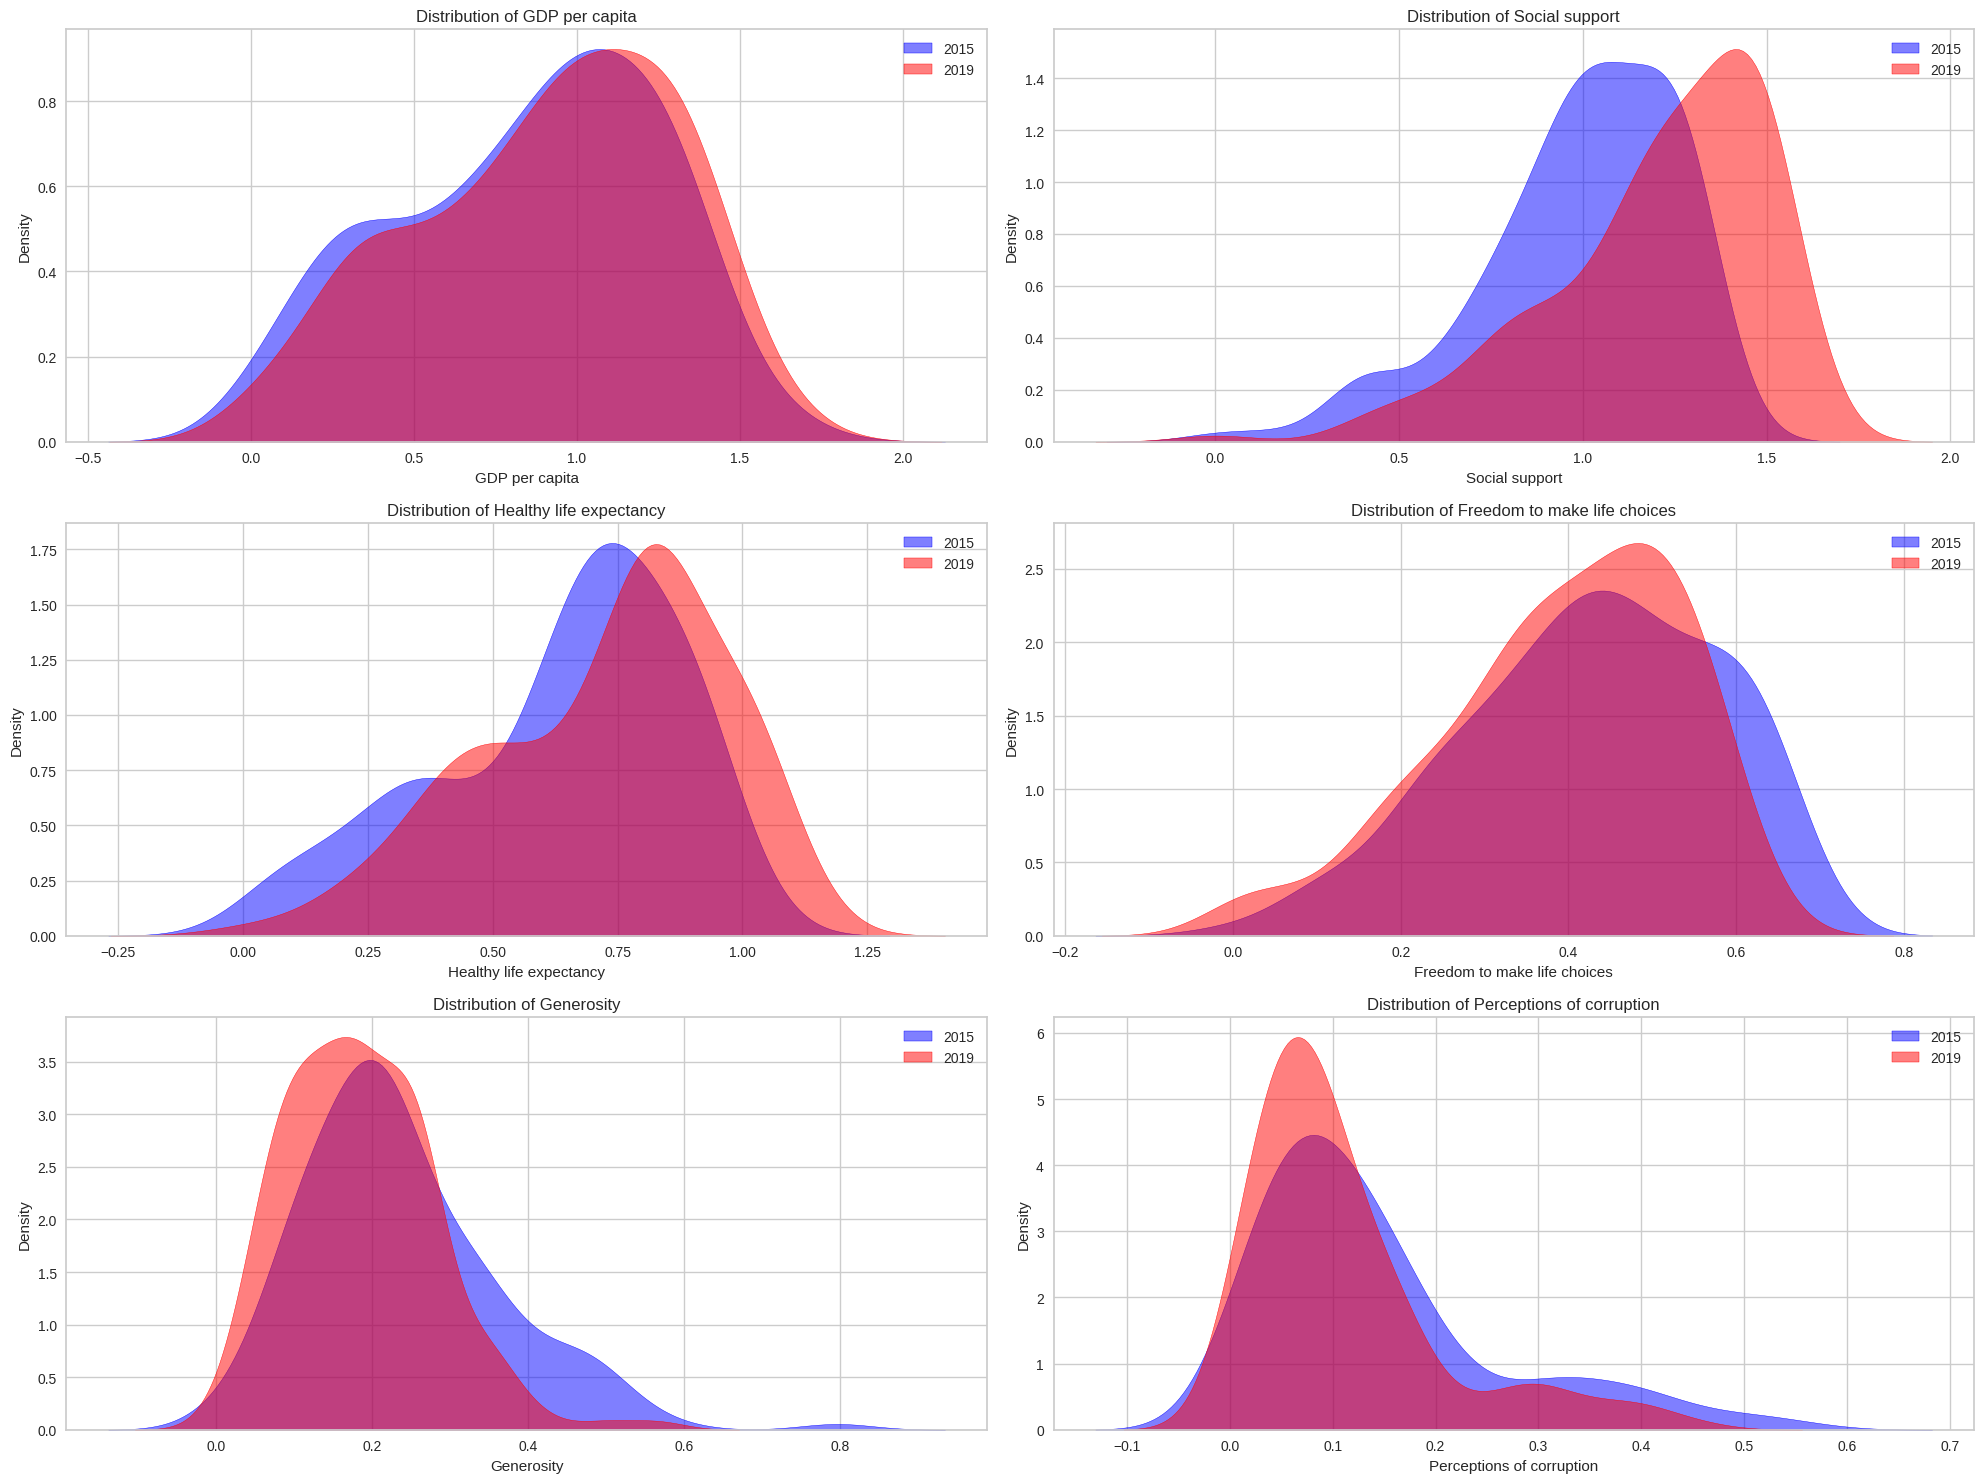

In [248]:
# Plot distributions for each feature
plt.figure(figsize=(20, 15))

for idx, feature in enumerate(features):
    plt.subplot(3, 2, idx + 1)

    sns.kdeplot(df_2015_selected[feature], label='2015', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(df_2019_selected[feature], label='2019', fill=True, color='red', alpha=0.5)

    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

In [249]:
# Calculate and display skewness
print("Feature-wise Skewness Comparison:")

for feature in features:
    skew_2015 = skew(df_2015_selected[feature])
    skew_2019 = skew(df_2019_selected[feature])

    print(f"{feature}:")
    print(f"  Skewness (2015) = {skew_2015:.3f}", end=" ")
    if abs(skew_2015) <= 0.5:
        print("(Approximately normal distribution)")
    elif abs(skew_2015) <= 1:
        print("(Moderate skewness)")
    else:
        print("(Strong skewness)")

    print(f"  Skewness (2019) = {skew_2019:.3f}", end=" ")
    if abs(skew_2019) <= 0.5:
        print("(Approximately normal distribution)")
    elif abs(skew_2019) <= 1:
        print("(Moderate skewness)")
    else:
        print("(Strong skewness)")

Feature-wise Skewness Comparison:
GDP per capita:
  Skewness (2015) = -0.315 (Approximately normal distribution)
  Skewness (2019) = -0.382 (Approximately normal distribution)
Social support:
  Skewness (2015) = -0.997 (Moderate skewness)
  Skewness (2019) = -1.124 (Strong skewness)
Healthy life expectancy:
  Skewness (2015) = -0.699 (Moderate skewness)
  Skewness (2019) = -0.608 (Moderate skewness)
Freedom to make life choices:
  Skewness (2015) = -0.410 (Approximately normal distribution)
  Skewness (2019) = -0.679 (Moderate skewness)
Generosity:
  Skewness (2015) = 0.992 (Moderate skewness)
  Skewness (2019) = 0.739 (Moderate skewness)
Perceptions of corruption:
  Skewness (2015) = 1.372 (Strong skewness)
  Skewness (2019) = 1.634 (Strong skewness)


Note:
Skewness between -0.5 and 0.5 suggests approximately normal distribution.
Skewness beyond ±1 suggests highly skewed data.


- GDP per capita is reasonably close to a normal distribution for both years.

- Freedom to make life choices is almost normal in 2015 but shows slight moderate skewness in 2019.

- Social support, Healthy life expectancy, and Generosity show moderate skewness.

- Perceptions of corruption is strongly right-skewed in both years, more in 2019.



- From histograms with normal curves, you can see that GDP, Freedom approximate bell-shape better than others.

- For Perceptions of Corruption, the curve is clearly right-skewed with long tail toward higher values.

Decision for the below tasks.

- Standardization or normalization is definitely required for all features because K-Means is distance-based and sensitive to scale.

- For very skewed features (especially Perceptions of Corruption and Social Support):

- better to apply log transformation or power transformation if you want to make distributions more symmetric before scaling. - Otherwise, StandardScaler will handle differences but not fix skewness completely.

Region and Countries in both datasets

<ipython-input-250-50f88b7bbc9f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette="viridis")


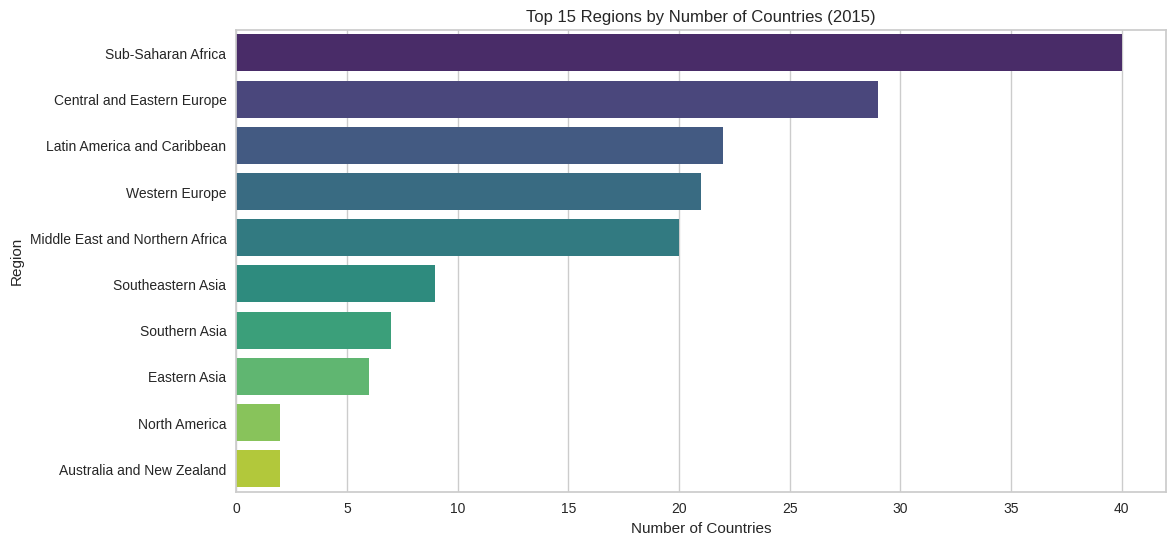

In [250]:
# Bar chart and statistics for Region (2015)

# Bar chart of top 15 regions
plt.figure(figsize=(12, 6))
region_counts = df_2015['Region'].value_counts().head(15)

sns.barplot(x=region_counts.values, y=region_counts.index, palette="viridis")
plt.title('Top 15 Regions by Number of Countries (2015)')
plt.xlabel('Number of Countries')
plt.ylabel('Region')
plt.show()

In [251]:
# Print unique regions, their counts and percentages
region_full_counts = df_2015['Region'].value_counts()
region_percentages = df_2015['Region'].value_counts(normalize=True) * 100

print(f"{'Region':45} {'Count':>6} {'Percentage':>12}")
print("-" * 65)
for region, count in region_full_counts.items():
    percentage = region_percentages[region]
    print(f"{region:45} {count:6d} {percentage:11.2f}%")


Region                                         Count   Percentage
-----------------------------------------------------------------
Sub-Saharan Africa                                40       25.32%
Central and Eastern Europe                        29       18.35%
Latin America and Caribbean                       22       13.92%
Western Europe                                    21       13.29%
Middle East and Northern Africa                   20       12.66%
Southeastern Asia                                  9        5.70%
Southern Asia                                      7        4.43%
Eastern Asia                                       6        3.80%
North America                                      2        1.27%
Australia and New Zealand                          2        1.27%


<ipython-input-252-f908c2657f7a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette="viridis")


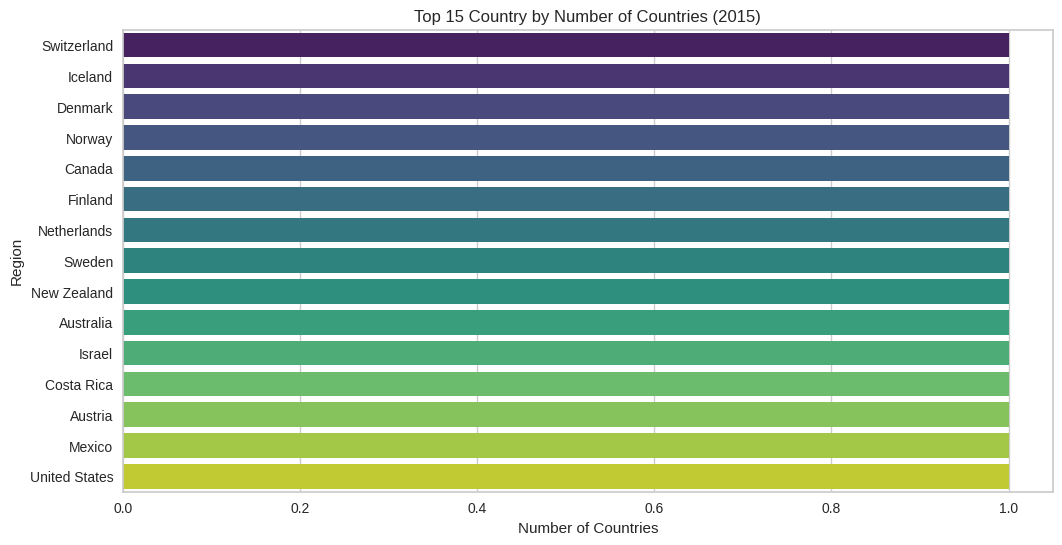

In [252]:
# Bar chart and statistics for Region (2015)

# Bar chart of top 15 regions
plt.figure(figsize=(12, 6))
region_counts = df_2015['Country'].value_counts().head(15)

sns.barplot(x=region_counts.values, y=region_counts.index, palette="viridis")
plt.title('Top 15 Country by Number of Countries (2015)')
plt.xlabel('Number of Countries')
plt.ylabel('Region')
plt.show()

In [253]:
# Print unique regions, their counts and percentages
region_full_counts = df_2015['Country'].value_counts()
region_percentages = df_2015['Country'].value_counts(normalize=True) * 100

print(f"{'Country':45} {'Count':>6} {'Percentage':>12}")
print("-" * 65)
for region, count in region_full_counts.items():
    percentage = region_percentages[region]
    print(f"{region:45} {count:6d} {percentage:11.2f}%")


Country                                        Count   Percentage
-----------------------------------------------------------------
Switzerland                                        1        0.63%
Iceland                                            1        0.63%
Denmark                                            1        0.63%
Norway                                             1        0.63%
Canada                                             1        0.63%
Finland                                            1        0.63%
Netherlands                                        1        0.63%
Sweden                                             1        0.63%
New Zealand                                        1        0.63%
Australia                                          1        0.63%
Israel                                             1        0.63%
Costa Rica                                         1        0.63%
Austria                                            1        0.63%
Mexico    

<ipython-input-254-cc3dd60caca0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette="viridis")


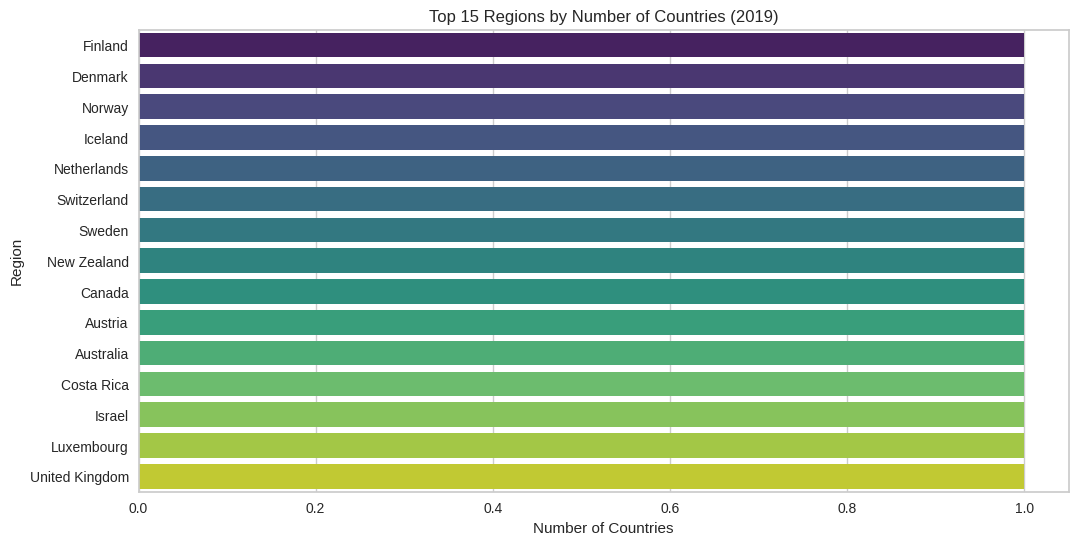

In [254]:
# Bar chart and statistics for Region (2019)

# Bar chart of top 15 regions
plt.figure(figsize=(12, 6))
region_counts = df_2019['Country or region'].value_counts().head(15)

sns.barplot(x=region_counts.values, y=region_counts.index, palette="viridis")
plt.title('Top 15 Regions by Number of Countries (2019)')
plt.xlabel('Number of Countries')
plt.ylabel('Region')
plt.show()

In [255]:
# Print unique regions, their counts and percentages
region_full_counts = df_2019['Country or region'].value_counts()
region_percentages = df_2019['Country or region'].value_counts(normalize=True) * 100

print(f"{'Region':45} {'Count':>6} {'Percentage':>12}")
print("-" * 65)
for region, count in region_full_counts.items():
    percentage = region_percentages[region]
    print(f"{region:45} {count:6d} {percentage:11.2f}%")


Region                                         Count   Percentage
-----------------------------------------------------------------
Finland                                            1        0.64%
Denmark                                            1        0.64%
Norway                                             1        0.64%
Iceland                                            1        0.64%
Netherlands                                        1        0.64%
Switzerland                                        1        0.64%
Sweden                                             1        0.64%
New Zealand                                        1        0.64%
Canada                                             1        0.64%
Austria                                            1        0.64%
Australia                                          1        0.64%
Costa Rica                                         1        0.64%
Israel                                             1        0.64%
Luxembourg

In [285]:
# £Create the Country -> Region mapping from 2015
country_region_mapping = df_2015[['Country', 'Region']].set_index('Country')['Region'].to_dict()

# Apply initial mapping to 2019
df_2019['Region'] = df_2019['Country or region'].map(country_region_mapping)

#Check countries that were not mapped
missing_regions = df_2019[df_2019['Region'].isnull()]
print(f"Number of countries without mapped Region: {missing_regions.shape[0]}")
print(missing_regions[['Country or region']])

#Manually map missing countries
manual_mapping = {
    'Northern Cyprus': 'Western Europe',
    'Hong Kong': 'East Asia',
    'Palestinian Territories': 'Middle East and North Africa',
    'Somalia': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Gambia': 'Sub-Saharan Africa',
    'Namibia': 'Sub-Saharan Africa',
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'North Macedonia': 'Central and Eastern Europe'
}


#Apply manual mapping
df_2019['Region'] = df_2019.apply(
    lambda row: manual_mapping.get(row['Country or region'], row['Region']), axis=1
)

#Final check
missing_final = df_2019[df_2019['Region'].isnull()]
if missing_final.shape[0] == 0:
    print("All countries have a mapped Region now.")
else:
    print("Some countries are still missing Region:")
    print(missing_final[['Country or region']])


Number of countries without mapped Region: 7
     Country or region
38   Trinidad & Tobago
63     Northern Cyprus
83     North Macedonia
111            Somalia
112            Namibia
119             Gambia
155        South Sudan
All countries have a mapped Region now.


In [286]:
# Fix region names in both datasets

# In 2015
df_2015['Region'] = df_2015['Region'].replace({
    'Eastern Asia': 'East Asia'
})

# In 2019
df_2019['Region'] = df_2019['Region'].replace({
    'Eastern Asia': 'East Asia'
})


<ipython-input-258-a40f694e7e5a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


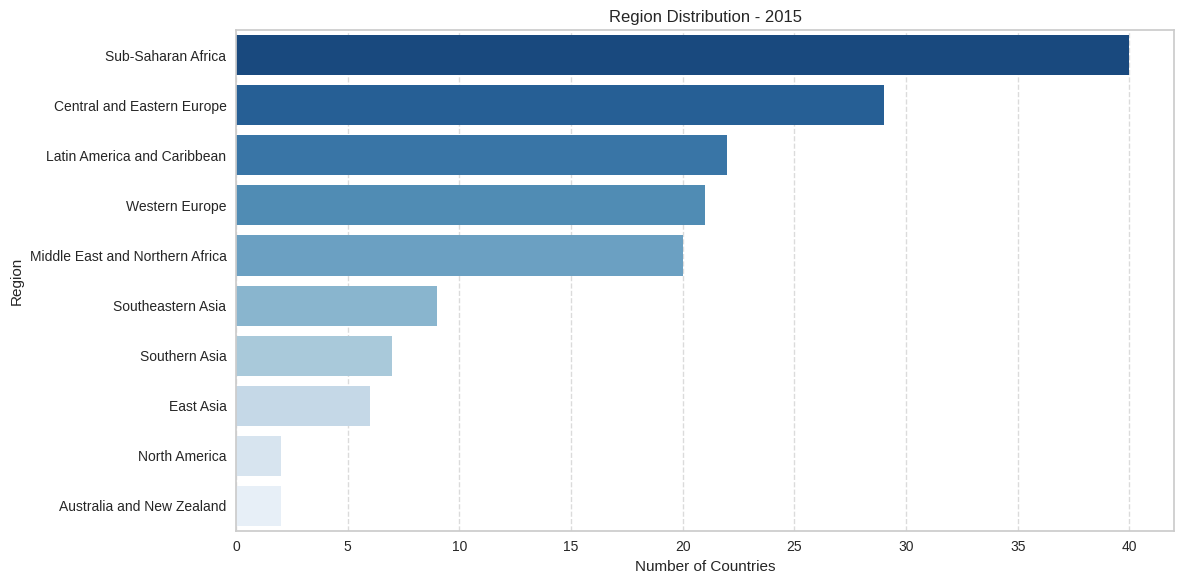

<ipython-input-258-a40f694e7e5a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


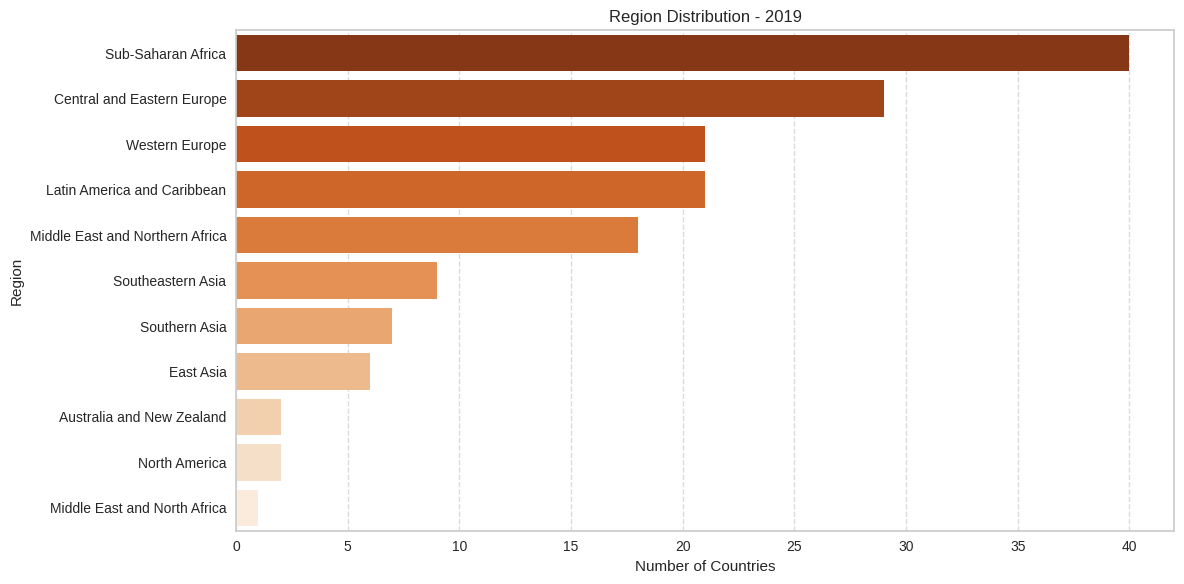

In [258]:
# Import matplotlib if not already
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for 2015
plt.figure(figsize=(12, 6))
sns.barplot(
    x=df_2015['Region'].value_counts().values,
    y=df_2015['Region'].value_counts().index,
    palette='Blues_r'
)
plt.title('Region Distribution - 2015')
plt.xlabel('Number of Countries')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for 2019
plt.figure(figsize=(12, 6))
sns.barplot(
    x=df_2019['Region'].value_counts().values,
    y=df_2019['Region'].value_counts().index,
    palette='Oranges_r'
)
plt.title('Region Distribution - 2019')
plt.xlabel('Number of Countries')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Data cleaning

### Subtask:
Clean the 2015 and 2019 datasets.  Handle any missing values and outliers.


In [259]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [260]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Region                        156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


In [287]:
# Rename columns in df_2015 to match df_2019
df_2015 = df_2015.rename(columns={
    'Country': 'Country or region',
    'Happiness Rank': 'Overall rank',
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'GDP per capita',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust (Government Corruption)': 'Perceptions of corruption'
})

# Drop unnecessary columns from df_2015
df_2015 = df_2015.drop(columns=['Standard Error', 'Dystopia Residual'])

# Reorder columns in the same order as df_2019
column_order = [
    'Overall rank',
    'Country or region',
    'Score',
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Region'
]

# Apply the column order
df_2015 = df_2015[column_order]
df_2019 = df_2019[column_order]

# Final confirmation
print("df_2015 columns:", df_2015.columns.tolist())
print("df_2019 columns:", df_2019.columns.tolist())


df_2015 columns: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Region']
df_2019 columns: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Region']


In [288]:
df_2015.rename(columns={'Country or region': 'Country'}, inplace=True)
df_2019.rename(columns={'Country or region': 'Country'}, inplace=True)

In [289]:
df_2015.info()
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  158 non-null    int64  
 1   Country                       158 non-null    object 
 2   Score                         158 non-null    float64
 3   GDP per capita                158 non-null    float64
 4   Social support                158 non-null    float64
 5   Healthy life expectancy       158 non-null    float64
 6   Freedom to make life choices  158 non-null    float64
 7   Generosity                    158 non-null    float64
 8   Perceptions of corruption     158 non-null    float64
 9   Region                        158 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column        

## Handling Outlier

**Reasoning**:
Check for missing values and impute them if necessary. Then, identify and handle outliers in numerical features for both dataframes.



In [264]:
#Select only the numeric features for clustering
features_to_check = [
    'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'
]

#Function to detect outliers with percentage
def detect_outliers_iqr(df, features):
    outlier_summary = {}
    total_rows = df.shape[0]

    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        num_outliers = outliers.shape[0]
        percentage_outliers = (num_outliers / total_rows) * 100

        outlier_summary[feature] = {
            'Number of Outliers': num_outliers,
            'Percentage of Outliers': round(percentage_outliers, 2),
            'Lower Bound': round(lower_bound, 4),
            'Upper Bound': round(upper_bound, 4)
        }

    return pd.DataFrame(outlier_summary).T

#Run outlier detection for df_2015
print("Outlier analysis for 2015 dataset:")
outlier_summary_2015 = detect_outliers_iqr(df_2015, features_to_check)
display(outlier_summary_2015)

#Run outlier detection for df_2019
print("Outlier analysis for 2019 dataset:")
outlier_summary_2019 = detect_outliers_iqr(df_2019, features_to_check)
display(outlier_summary_2019)


Outlier analysis for 2015 dataset:


,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Score,0.0,0.00,1.9494,8.8204
GDP per capita,0.0,0.00,-0.3732,2.0774
Social support,3.0,1.90,0.3204,1.7508
Healthy life expectancy,0.0,0.00,-0.1186,1.3688
Freedom to make life choices,0.0,0.00,-0.0028,0.8802
Generosity,2.0,1.27,-0.0884,0.5489
Perceptions of corruption,14.0,8.86,-0.1162,0.3581


Outlier analysis for 2019 dataset:


,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Score,0.0,0.00,2.0845,8.6445
GDP per capita,0.0,0.00,-0.3419,2.1771
Social support,4.0,2.56,0.4606,2.0476
Healthy life expectancy,1.0,0.64,0.0468,1.3828
Freedom to make life choices,1.0,0.64,0.0091,0.8061
Generosity,2.0,1.28,-0.1005,0.4575
Perceptions of corruption,14.0,8.97,-0.0944,0.2826


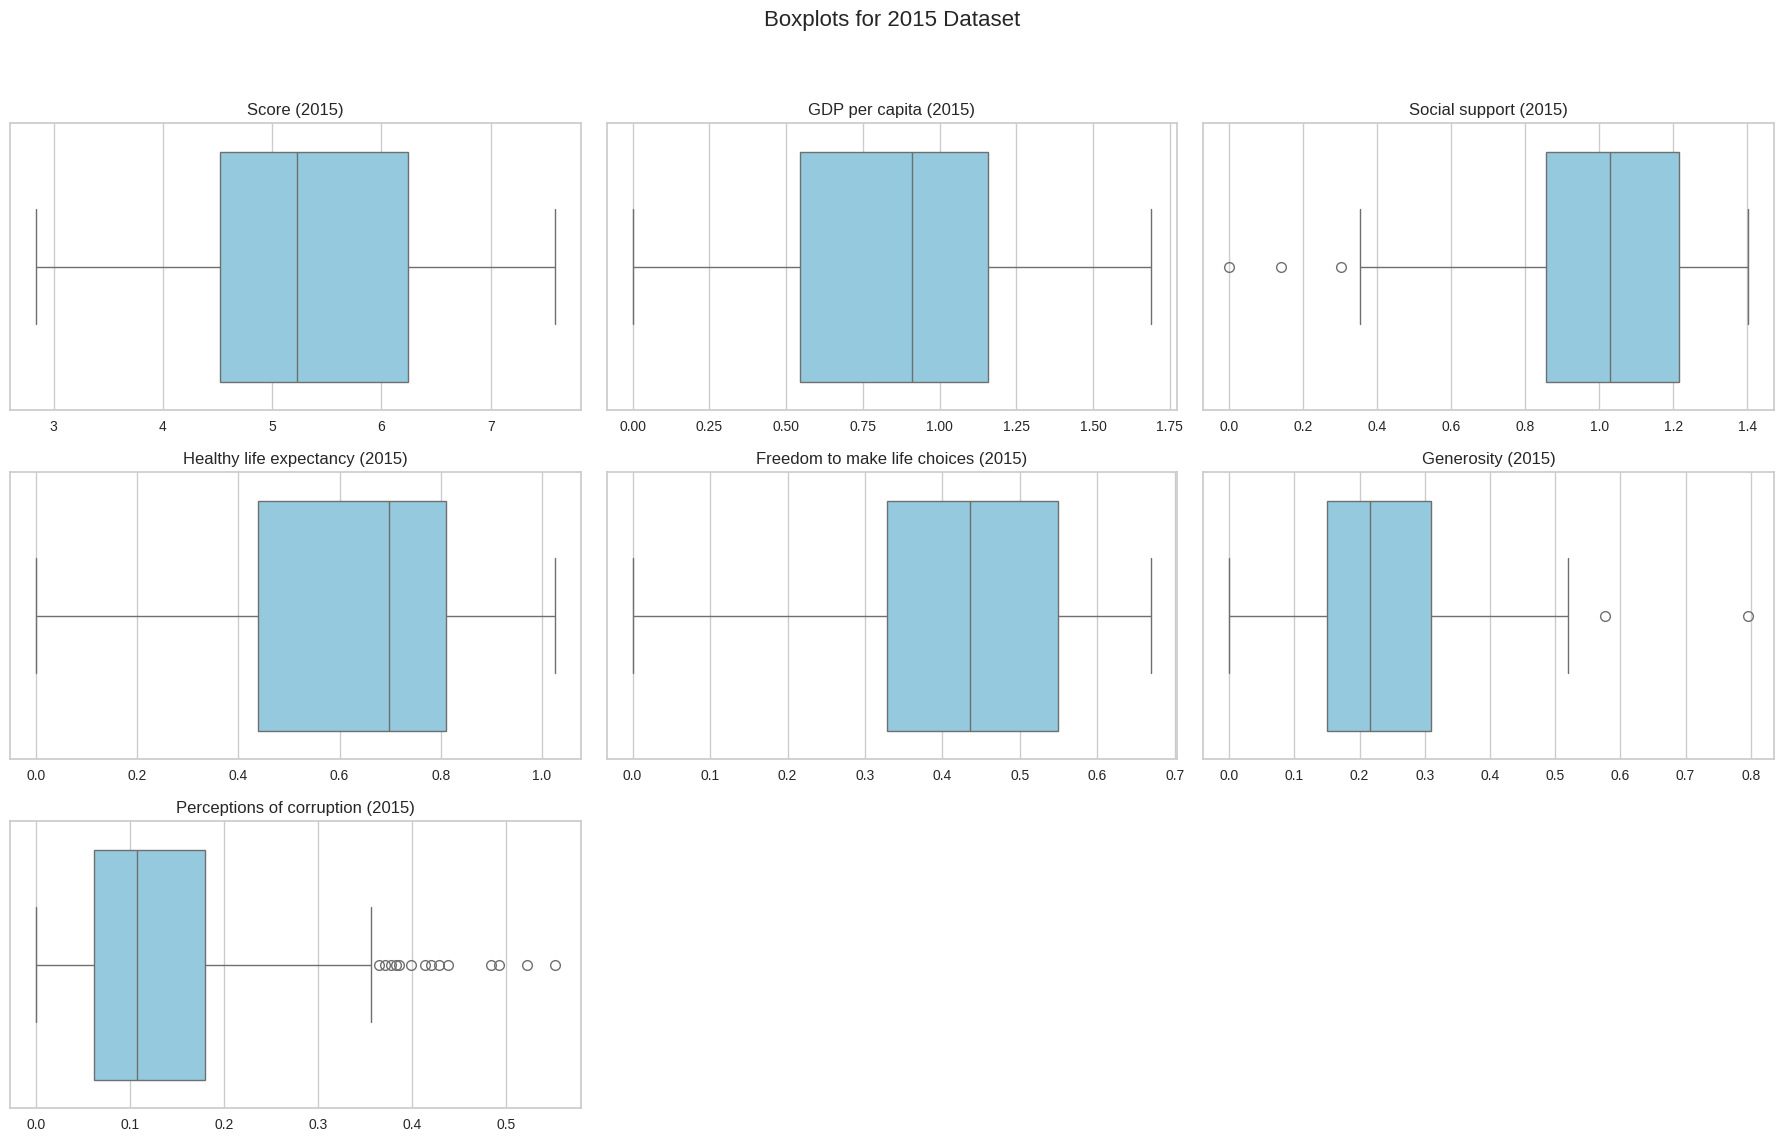

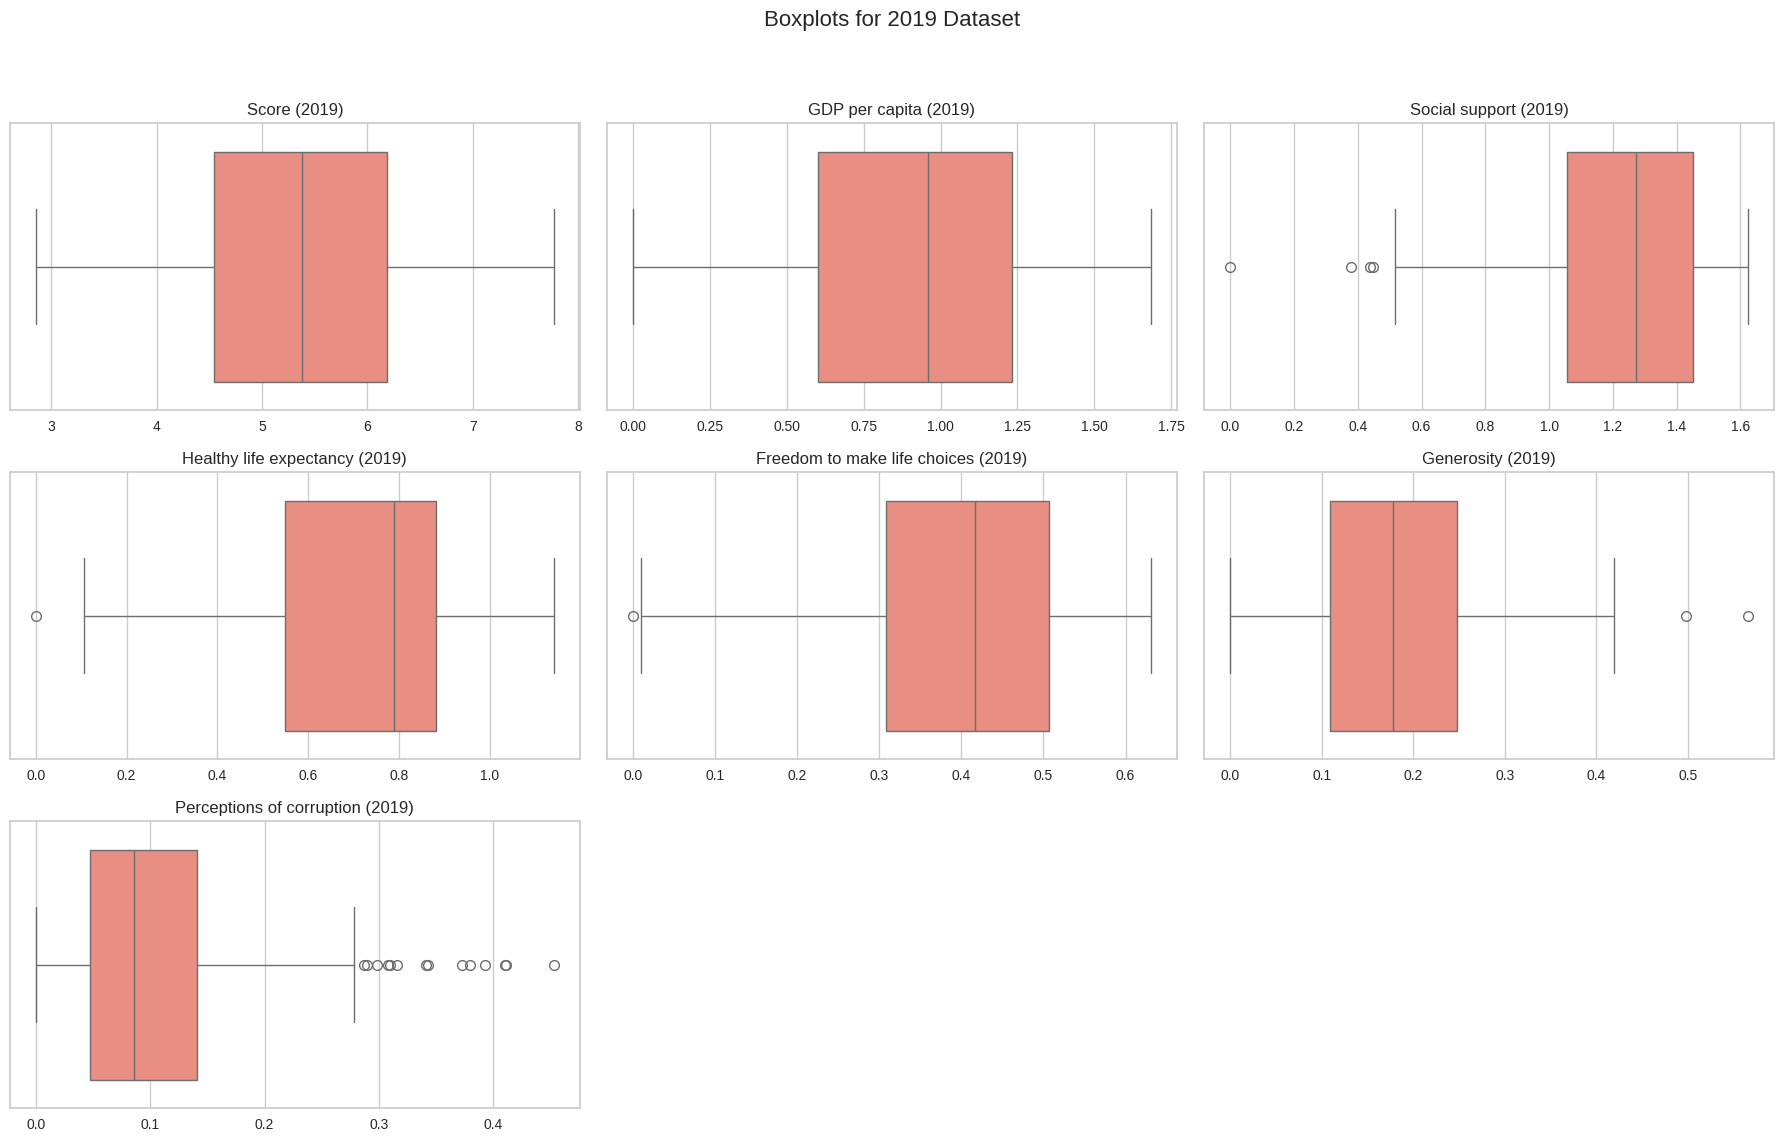

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for df_2015
plt.figure(figsize=(18, 12))
for idx, feature in enumerate(features_to_check):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(x=df_2015[feature], color='skyblue')
    plt.title(f'{feature} (2015)')
    plt.xlabel('')
plt.suptitle('Boxplots for 2015 Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Boxplots for df_2019
plt.figure(figsize=(18, 12))
for idx, feature in enumerate(features_to_check):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(x=df_2019[feature], color='salmon')
    plt.title(f'{feature} (2019)')
    plt.xlabel('')
plt.suptitle('Boxplots for 2019 Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Except for Perceptions of corruption, most features have very few outliers (< 3%). Outliers are natural in social-economic data, especially for features like corruption perception.
Thus, major outlier removal is not necessary before clustering.

## Feature Engineering

### Correlation Analysis

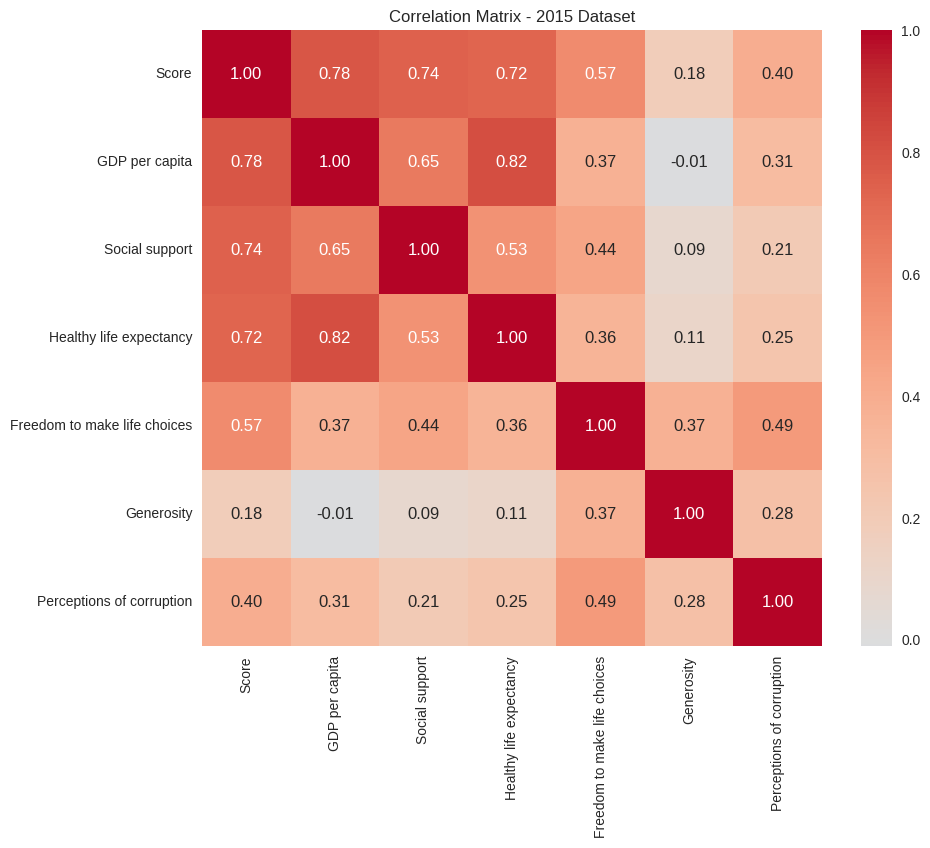

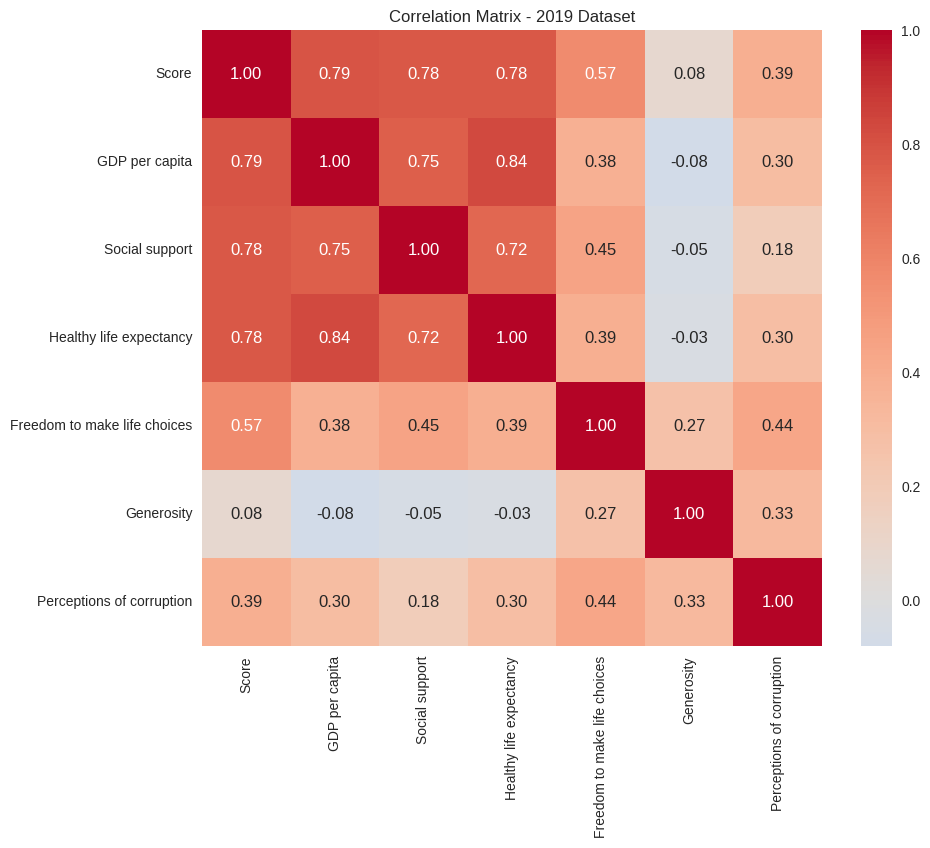

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to check correlation
features_for_corr = [
    'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'
]

# Plot correlation heatmap for 2015
plt.figure(figsize=(10, 8))
sns.heatmap(df_2015[features_for_corr].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - 2015 Dataset')
plt.show()

# Plot correlation heatmap for 2019
plt.figure(figsize=(10, 8))
sns.heatmap(df_2019[features_for_corr].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - 2019 Dataset')
plt.show()


### Variance Analysis

In [277]:
from sklearn.feature_selection import VarianceThreshold

# Features to check
features_to_check = [
    'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'
]

# Function to calculate and display variances
def calculate_variance(df, dataset_name):
    selector = VarianceThreshold(threshold=0.0)  # threshold=0.0 to get all variances
    selector.fit(df[features_to_check])

    variances = selector.variances_

    print(f"Feature Variances for {dataset_name}:")
    for feature, var in zip(features_to_check, variances):
        print(f"{feature:30}: Variance = {var:.4f}")

    return dict(zip(features_to_check, variances))

# Calculate for df_2015
variances_2015 = calculate_variance(df_2015, "2015 Dataset")

# Calculate for df_2019
variances_2019 = calculate_variance(df_2019, "2019 Dataset")


Feature Variances for 2015 Dataset:
Score                         : Variance = 1.0000
GDP per capita                : Variance = 1.0000
Social support                : Variance = 1.0000
Healthy life expectancy       : Variance = 1.0000
Freedom to make life choices  : Variance = 1.0000
Generosity                    : Variance = 1.0000
Perceptions of corruption     : Variance = 1.0000
Feature Variances for 2019 Dataset:
Score                         : Variance = 0.9450
GDP per capita                : Variance = 0.9766
Social support                : Variance = 1.2066
Healthy life expectancy       : Variance = 0.9602
Freedom to make life choices  : Variance = 0.9041
Generosity                    : Variance = 0.5653
Perceptions of corruption     : Variance = 0.6202


### New Features

Variance analysis indicated that all original features have sufficient variability and were retained.
Correlation analysis revealed strong positive relationships between GDP per capita, Healthy life expectancy, and Social support.
Therefore, engineered features such as Economic_Health_Index and Social_Economic_Index were introduced to capture these strong socio-economic patterns for improved clustering.

In [290]:
# Create new engineered features in df_2015
df_2015['Economic_Health_Index'] = (df_2015['GDP per capita'] + df_2015['Healthy life expectancy']) / 2
df_2015['Social_Economic_Index'] = (df_2015['GDP per capita'] + df_2015['Social support']) / 2
df_2015['Freedom_Trust_Index'] = (df_2015['Freedom to make life choices'] + df_2015['Perceptions of corruption']) / 2

# Create new engineered features in df_2019
df_2019['Economic_Health_Index'] = (df_2019['GDP per capita'] + df_2019['Healthy life expectancy']) / 2
df_2019['Social_Economic_Index'] = (df_2019['GDP per capita'] + df_2019['Social support']) / 2
df_2019['Freedom_Trust_Index'] = (df_2019['Freedom to make life choices'] + df_2019['Perceptions of corruption']) / 2


In [291]:
def dfs_info():
    print("df_2015 info:")
    df_2015.info()
    print("\ndf_2019 info:")
    df_2019.info()

dfs_info()

df_2015 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  158 non-null    int64  
 1   Country                       158 non-null    object 
 2   Score                         158 non-null    float64
 3   GDP per capita                158 non-null    float64
 4   Social support                158 non-null    float64
 5   Healthy life expectancy       158 non-null    float64
 6   Freedom to make life choices  158 non-null    float64
 7   Generosity                    158 non-null    float64
 8   Perceptions of corruption     158 non-null    float64
 9   Region                        158 non-null    object 
 10  Economic_Health_Index         158 non-null    float64
 11  Social_Economic_Index         158 non-null    float64
 12  Freedom_Trust_Index           158 non-null    floa

### Feature Encoding

In [292]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Initialize OneHotEncoder (corrected for new scikit-learn versions)
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse

#One-Hot Encode Region for df_2015
region_encoded_2015 = ohe.fit_transform(df_2015[['Region']])
region_encoded_df_2015 = pd.DataFrame(region_encoded_2015, columns=ohe.get_feature_names_out(['Region']))

#ne-Hot Encode Region for df_2019
region_encoded_2019 = ohe.fit_transform(df_2019[['Region']])
region_encoded_df_2019 = pd.DataFrame(region_encoded_2019, columns=ohe.get_feature_names_out(['Region']))

#Drop 'Country' and 'Region' columns from original dfs
df_2015_for_clustering = df_2015.drop(columns=['Country', 'Region'])
df_2019_for_clustering = df_2019.drop(columns=['Country', 'Region'])

#Concatenate the encoded Region back to original numerical features
df_2015_ready = pd.concat([df_2015_for_clustering.reset_index(drop=True), region_encoded_df_2015.reset_index(drop=True)], axis=1)
df_2019_ready = pd.concat([df_2019_for_clustering.reset_index(drop=True), region_encoded_df_2019.reset_index(drop=True)], axis=1)

The Country column was removed because it is a non-informative identifier not suitable for clustering.
The Region column was one-hot encoded to capture meaningful geographic groupings and enhance clustering quality.

### Feature Scaling

- (Score, GDP, Social Support, etc.) is mostly continuous and not strongly skewed (except maybe corruption),

- already observed outliers in some features (especially corruption).

Thus, Standardization (Z-score scaling) is the better choice for consistency and stability.

In [294]:
#Standard Scaling
scaler = StandardScaler()

# Scale 2015# Step 5: Standard Scaling (scale all features now)
scaler = StandardScaler()

df_2015_scaled = pd.DataFrame(
    scaler.fit_transform(df_2015_ready),
    columns=df_2015_ready.columns
)

df_2019_scaled = pd.DataFrame(
    scaler.fit_transform(df_2019_ready),
    columns=df_2019_ready.columns
)

In [295]:
# Final check
print("df_2015_scaled shape:", df_2015_scaled.shape)
print("df_2019_scaled shape:", df_2019_scaled.shape)

df_2015_scaled shape: (158, 20)
df_2019_scaled shape: (156, 21)


In [296]:
df_2015_scaled = pd.DataFrame(
    scaler.fit_transform(df_2015_ready),
    columns=df_2015_ready.columns
)

# Scale 2019
df_2019_scaled = pd.DataFrame(
    scaler.fit_transform(df_2019_ready),
    columns=df_2019_ready.columns
)

# Final checks
print("df_2015_scaled shape:", df_2015_scaled.shape)
print("df_2019_scaled shape:", df_2019_scaled.shape)

df_2015_scaled shape: (158, 20)
df_2019_scaled shape: (156, 21)


In [298]:
df_2015_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,158.0,8.994212e-17,1.00318,-1.721000,-0.860431,0.000139,0.860708,1.721277
Score,158.0,9.893633e-16,1.00318,-2.222513,-0.744479,-0.125492,0.760496,1.937360
GDP per capita,158.0,-2.248553e-16,1.00318,-2.105641,-0.747381,0.159534,0.777195,2.101026
Social support,158.0,-2.248553e-16,1.00318,-3.650183,-0.494367,0.141669,0.822668,1.514458
Healthy life expectancy,158.0,-2.248553e-16,1.00318,-2.558965,-0.775796,0.269781,0.733890,1.603732
Freedom to make life choices,158.0,4.497106e-17,1.00318,-2.853340,-0.667609,0.045935,0.802033,1.605131
Generosity,158.0,2.698264e-16,1.00318,-1.879071,-0.686892,-0.167603,0.574794,4.423262
Perceptions of corruption,158.0,6.745659e-17,1.00318,-1.198642,-0.683196,-0.302555,0.307832,3.413922
Economic_Health_Index,158.0,-4.047395e-16,1.00318,-2.224990,-0.847459,0.201069,0.786750,1.728407
Social_Economic_Index,158.0,-1.798842e-16,1.00318,-2.868092,-0.808748,0.150960,0.846316,1.553789


In [299]:
df_2015_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,158.0,8.994212e-17,1.00318,-1.721000,-0.860431,0.000139,0.860708,1.721277
Score,158.0,9.893633e-16,1.00318,-2.222513,-0.744479,-0.125492,0.760496,1.937360
GDP per capita,158.0,-2.248553e-16,1.00318,-2.105641,-0.747381,0.159534,0.777195,2.101026
Social support,158.0,-2.248553e-16,1.00318,-3.650183,-0.494367,0.141669,0.822668,1.514458
Healthy life expectancy,158.0,-2.248553e-16,1.00318,-2.558965,-0.775796,0.269781,0.733890,1.603732
Freedom to make life choices,158.0,4.497106e-17,1.00318,-2.853340,-0.667609,0.045935,0.802033,1.605131
Generosity,158.0,2.698264e-16,1.00318,-1.879071,-0.686892,-0.167603,0.574794,4.423262
Perceptions of corruption,158.0,6.745659e-17,1.00318,-1.198642,-0.683196,-0.302555,0.307832,3.413922
Economic_Health_Index,158.0,-4.047395e-16,1.00318,-2.224990,-0.847459,0.201069,0.786750,1.728407
Social_Economic_Index,158.0,-1.798842e-16,1.00318,-2.868092,-0.808748,0.150960,0.846316,1.553789


## Data clustering

In [302]:
df_2015_scaled.info()
df_2019_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Overall rank                            158 non-null    float64
 1   Score                                   158 non-null    float64
 2   GDP per capita                          158 non-null    float64
 3   Social support                          158 non-null    float64
 4   Healthy life expectancy                 158 non-null    float64
 5   Freedom to make life choices            158 non-null    float64
 6   Generosity                              158 non-null    float64
 7   Perceptions of corruption               158 non-null    float64
 8   Economic_Health_Index                   158 non-null    float64
 9   Social_Economic_Index                   158 non-null    float64
 10  Freedom_Trust_Index                     158 non-null    float6

### Finding the K

In [303]:
!pip install yellowbrick

In [305]:
# Import necessary libraries
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [306]:
# Select only the clustering features
# Excluding Overall rank if you want purely feature-based clusters)
features_for_clustering = [
    'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
    'Economic_Health_Index', 'Social_Economic_Index', 'Freedom_Trust_Index',
    # Add Region Encoded Columns
    'Region_Central and Eastern Europe', 'Region_East Asia', 'Region_Latin America and Caribbean',
    'Region_Middle East and Northern Africa', 'Region_North America',
    'Region_Southeastern Asia', 'Region_Southern Asia', 'Region_Sub-Saharan Africa', 'Region_Western Europe'
]

Finding optimal k for 2015 dataset...


/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


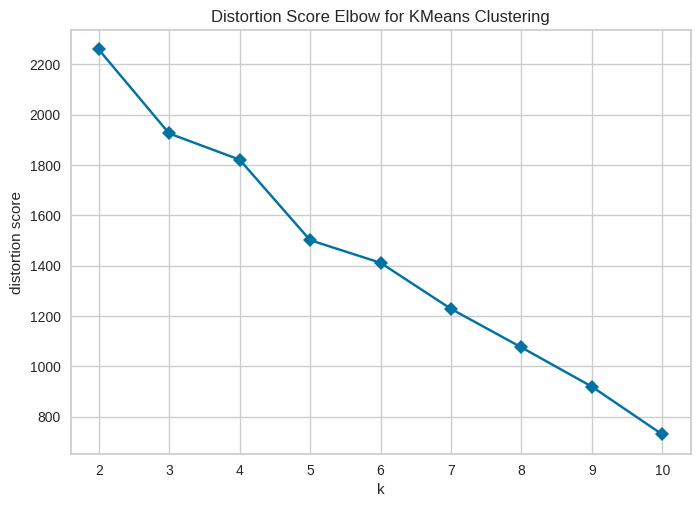

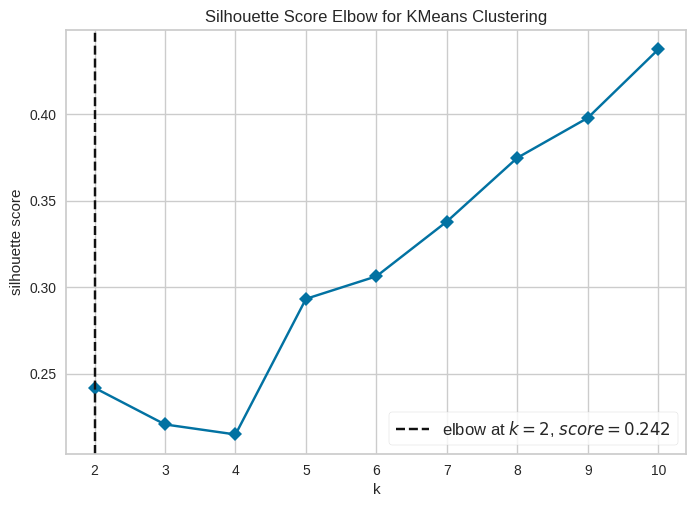

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [309]:
# Elbow and Silhouette for 2015
print("Finding optimal k for 2015 dataset...")

# Elbow Method (Distortion)
model_2015 = KMeans(random_state=42)
visualizer_2015_elbow = KElbowVisualizer(model_2015, k=(2,11), metric='distortion', timings=False)

visualizer_2015_elbow.fit(df_2015_scaled[features_for_clustering])
visualizer_2015_elbow.show()

# Silhouette Method
model_2015_sil = KMeans(random_state=42)
visualizer_2015_silhouette = KElbowVisualizer(model_2015_sil, k=(2,11), metric='silhouette', timings=False)

visualizer_2015_silhouette.fit(df_2015_scaled[features_for_clustering])
visualizer_2015_silhouette.show()

Based on the Elbow method, a clear bend was observed at k=5, suggesting optimal clustering into 5 groups.
Silhouette analysis showed gradual improvement beyond k=5, peaking at k=10. However, for simplicity and generalizability, k=5 was selected as the optimal number of clusters for 2015.

Finding optimal k for 2019 dataset...


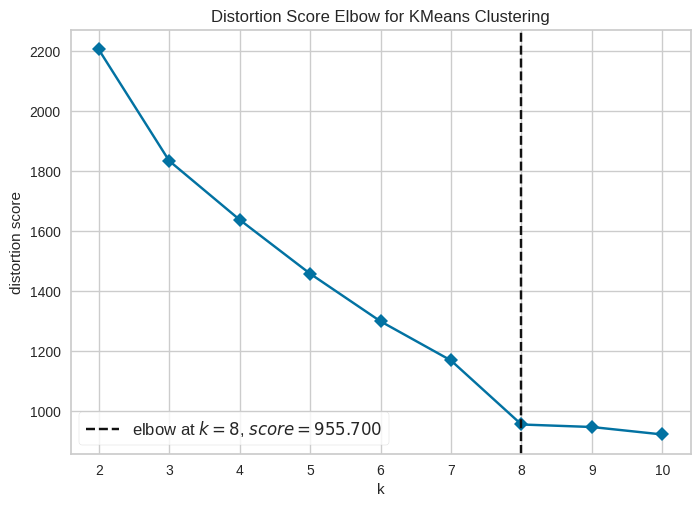

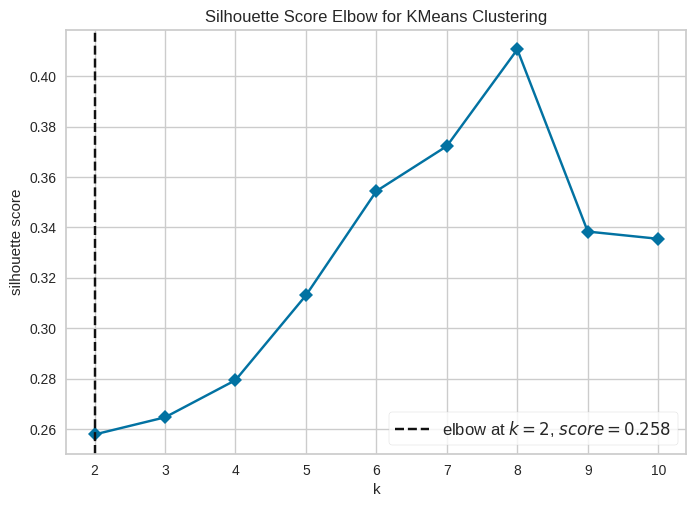

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [310]:
# Elbow and Silhouette for 2019
print("Finding optimal k for 2019 dataset...")

# Elbow Method (Distortion)
model_2019 = KMeans(random_state=42)
visualizer_2019_elbow = KElbowVisualizer(model_2019, k=(2,11), metric='distortion', timings=False)

visualizer_2019_elbow.fit(df_2019_scaled[features_for_clustering])
visualizer_2019_elbow.show()

# Silhouette Method
model_2019_sil = KMeans(random_state=42)
visualizer_2019_silhouette = KElbowVisualizer(model_2019_sil, k=(2,11), metric='silhouette', timings=False)

visualizer_2019_silhouette.fit(df_2019_scaled[features_for_clustering])
visualizer_2019_silhouette.show()

For the 2019 dataset, both the Elbow method and Silhouette analysis consistently indicated that 8 clusters (k=8) provided the best structure.
The Elbow plot showed a clear bend at k=8, and the Silhouette score reached its peak at the same point, ensuring optimal balance between compactness and separation.

### Clustering with the finalized K

In [311]:
# Import necessary libraries
from sklearn.cluster import KMeans
import pandas as pd

In [312]:
# Final KMeans for 2015 dataset
kmeans_2015 = KMeans(n_clusters=5, random_state=42)
clusters_2015 = kmeans_2015.fit_predict(df_2015_scaled)

# Add the cluster labels to the original df_2015
df_2015['Cluster'] = clusters_2015

# Cluster size summary for 2015
print("\nCluster Distribution for 2015 Dataset:")
print(df_2015['Cluster'].value_counts().sort_index())


Cluster Distribution for 2015 Dataset:
Cluster
0    46
1    48
2    21
3    17
4    26
Name: count, dtype: int64


In [313]:
#Final KMeans for 2019 dataset
kmeans_2019 = KMeans(n_clusters=8, random_state=42)
clusters_2019 = kmeans_2019.fit_predict(df_2019_scaled)

# Add the cluster labels to the original df_2019
df_2019['Cluster'] = clusters_2019

# Cluster size summary for 2019
print("\nCluster Distribution for 2019 Dataset:")
print(df_2019['Cluster'].value_counts().sort_index())



Cluster Distribution for 2019 Dataset:
Cluster
0    20
1    40
2    25
3     7
4     6
5    17
6     9
7    32
Name: count, dtype: int64


Final KMeans clustering was performed with 5 clusters for the 2015 dataset and 8 clusters for the 2019 dataset, based on Elbow and Silhouette analysis.
Cluster labels were assigned to each country, enabling further group-based analysis and comparisons across datasets.

## Evaluate the Cluster Perfomance

In [314]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [315]:
# 2015 Cluster Evaluation
print("\n--- 2015 Dataset Cluster Evaluation ---")
silhouette_2015 = silhouette_score(df_2015_scaled, df_2015['Cluster'])
davies_bouldin_2015 = davies_bouldin_score(df_2015_scaled, df_2015['Cluster'])
calinski_harabasz_2015 = calinski_harabasz_score(df_2015_scaled, df_2015['Cluster'])

print(f"Silhouette Score: {silhouette_2015:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_2015:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_2015:.4f}")


--- 2015 Dataset Cluster Evaluation ---
Silhouette Score: 0.2915
Davies-Bouldin Index: 1.4041
Calinski-Harabasz Index: 38.8699


In [316]:
# 2019 Cluster Evaluation
print("\n--- 2019 Dataset Cluster Evaluation ---")
silhouette_2019 = silhouette_score(df_2019_scaled, df_2019['Cluster'])
davies_bouldin_2019 = davies_bouldin_score(df_2019_scaled, df_2019['Cluster'])
calinski_harabasz_2019 = calinski_harabasz_score(df_2019_scaled, df_2019['Cluster'])

print(f"Silhouette Score: {silhouette_2019:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_2019:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_2019:.4f}")


--- 2019 Dataset Cluster Evaluation ---
Silhouette Score: 0.4051
Davies-Bouldin Index: 0.9771
Calinski-Harabasz Index: 39.1328


Cluster quality was evaluated using Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index.
The 2015 dataset achieved a moderate silhouette score (0.2915), indicating reasonable cluster separation, although compactness was limited (DBI=1.4041).
The 2019 dataset demonstrated stronger clustering quality, with a silhouette score of 0.4051 and a Davies-Bouldin Index below 1.0, indicating more well-defined and separated clusters.

## Model Drift Analysis

In [317]:
import numpy as np
from scipy.spatial.distance import cdist

In [319]:
#Make sure the columns align
common_features = list(set(df_2015_scaled.columns) & set(df_2019_scaled.columns))
common_features = sorted(common_features)  # Sort to keep consistent order

print(f"Common features used for centroid comparison: {common_features}")

Common features used for centroid comparison: ['Economic_Health_Index', 'Freedom to make life choices', 'Freedom_Trust_Index', 'GDP per capita', 'Generosity', 'Healthy life expectancy', 'Overall rank', 'Perceptions of corruption', 'Region_Central and Eastern Europe', 'Region_East Asia', 'Region_Latin America and Caribbean', 'Region_Middle East and Northern Africa', 'Region_North America', 'Region_Southeastern Asia', 'Region_Southern Asia', 'Region_Sub-Saharan Africa', 'Region_Western Europe', 'Score', 'Social support', 'Social_Economic_Index']


In [320]:
# Refit KMeans centroids only on common features
kmeans_2015_common = KMeans(n_clusters=5, random_state=42).fit(df_2015_scaled[common_features])
kmeans_2019_common = KMeans(n_clusters=8, random_state=42).fit(df_2019_scaled[common_features])

centroids_2015_common = kmeans_2015_common.cluster_centers_
centroids_2019_common = kmeans_2019_common.cluster_centers_

In [321]:
# Compute centroid distance matrix
from scipy.spatial.distance import cdist

centroid_distances = cdist(centroids_2015_common, centroids_2019_common, metric='euclidean')

# 4. Display result
import pandas as pd

print("\nCentroid Distance Matrix (2015 vs 2019):")
print(pd.DataFrame(centroid_distances,
                   index=[f'2015_Cluster_{i}' for i in range(centroids_2015_common.shape[0])],
                   columns=[f'2019_Cluster_{i}' for i in range(centroids_2019_common.shape[0])]))



Centroid Distance Matrix (2015 vs 2019):
                2019_Cluster_0  2019_Cluster_1  2019_Cluster_2  \
2015_Cluster_0        4.896957        4.820958        4.805081   
2015_Cluster_1        5.575986        0.724551        7.349898   
2015_Cluster_2        5.679543        5.744271        4.779287   
2015_Cluster_3        5.982771        5.075556        5.675482   
2015_Cluster_4        6.199279        7.696586        0.492502   

                2019_Cluster_3  2019_Cluster_4  2019_Cluster_5  \
2015_Cluster_0        3.795986        3.705712        1.054556   
2015_Cluster_1        4.809256        5.511339        4.845480   
2015_Cluster_2        4.843866        0.443479        3.961938   
2015_Cluster_3        0.345465        4.703389        3.935492   
2015_Cluster_4        5.939813        5.047791        5.170682   

                2019_Cluster_6  2019_Cluster_7  
2015_Cluster_0        5.107587        5.627482  
2015_Cluster_1        7.294408        4.932560  
2015_Cluster_2   

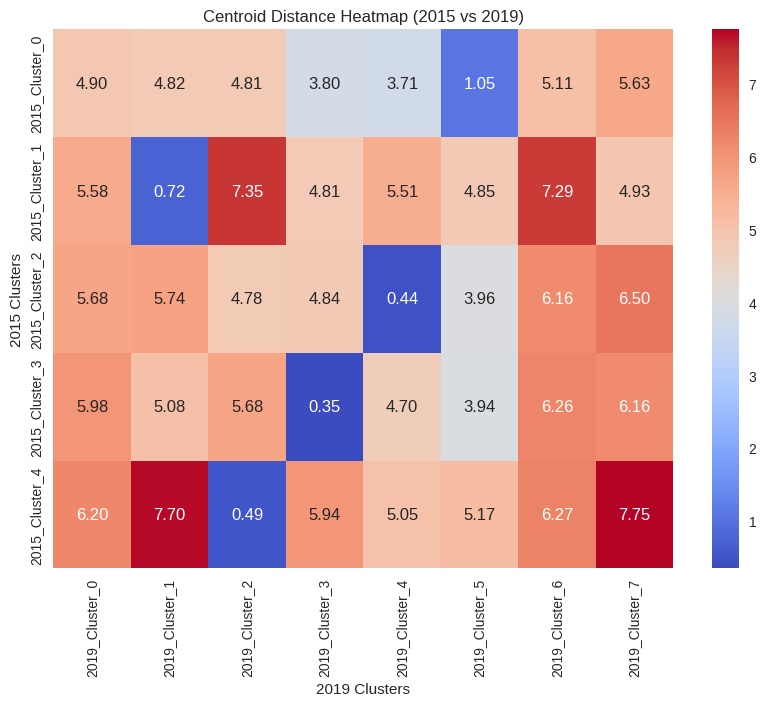

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 7))

# Create heatmap
sns.heatmap(centroid_distances, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=[f'2019_Cluster_{i}' for i in range(centroids_2019_common.shape[0])],
            yticklabels=[f'2015_Cluster_{i}' for i in range(centroids_2015_common.shape[0])])

plt.title("Centroid Distance Heatmap (2015 vs 2019)")
plt.xlabel("2019 Clusters")
plt.ylabel("2015 Clusters")
plt.show()

- 2015 Cluster 3 and 2019 Cluster 3 → Distance = 0.35 (very small) : Means these two clusters were very similar over time.

- 2015 Cluster 2 and 2019 Cluster 4 → Distance = 0.44 - Again, high similarity for these two clusters.

- Other cluster pairs (e.g., 2015 Cluster 4 and 2019 Cluster 1 → 7.70) show very high drift.

So some clusters survived across years, but many split, merged, or drifted.

The Centroid Distance Heatmap revealed that while a few clusters (e.g., 2015 Cluster 3 and 2019 Cluster 3) remained structurally similar over time, most clusters underwent substantial shifts in feature space.
This suggests that the socio-economic, health, and support factors defining countries' groupings evolved significantly between 2015 and 2019, leading to cluster reorganization.

### Cluster Membership Change

In [324]:
# Cluster counts for 2015 and 2019
cluster_counts_2015 = df_2015['Cluster'].value_counts().sort_index()
cluster_counts_2019 = df_2019['Cluster'].value_counts().sort_index()

# Combine into a DataFrame
membership_change = pd.DataFrame({
    '2015 Cluster Size': cluster_counts_2015,
    '2019 Cluster Size': cluster_counts_2019
}).fillna(0)  # Fill missing clusters with 0

print("\nCluster Membership Change between 2015 and 2019:")
membership_change


Cluster Membership Change between 2015 and 2019:


,2015 Cluster Size,2019 Cluster Size
Cluster,,
0,46.0,20
1,48.0,40
2,21.0,25
3,17.0,7
4,26.0,6
5,0.0,17
6,0.0,9
7,0.0,32


- This shows completely new cluster formations in 2019 (Cluster 5, 6, 7).
- Some 2015 clusters shrank heavily or dissolved.

It means: The population distribution across clusters changed significantly between 2015 and 2019.

### KL Divergence

In [325]:
from scipy.stats import entropy

# Normalize counts into probabilities
p_2015 = cluster_counts_2015 / cluster_counts_2015.sum()
p_2019 = cluster_counts_2019 / cluster_counts_2019.sum()

# Align indexes to match clusters
p_2015, p_2019 = p_2015.align(p_2019, fill_value=0)

# KL Divergence Calculation
kl_divergence = entropy(p_2015, p_2019)

print(f"\nKL Divergence between 2015 and 2019 cluster distributions: {kl_divergence:.4f}")



KL Divergence between 2015 and 2019 cluster distributions: 0.5987


KL Divergence value: 0.5987 is well above 0.5 which means:

- Strong distributional drift happened between 2015 and 2019.
- The structure of clusters changed considerably.

- It suggests important shifts in country characteristics like economy, health, social support, etc.

The analysis of cluster membership change and KL divergence (0.5987) confirmed substantial model drift between 2015 and 2019.
Significant shifts in cluster sizes and the emergence of new clusters indicated that country-level attributes such as economic health, social support, and freedom underwent notable changes over time.

## Data Visualisation with PCA

In [326]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to apply PCA and plot clusters
def plot_pca_clusters(df_scaled, cluster_labels, title):
    pca = PCA(n_components=2, random_state=42)
    pca_components = pca.fit_transform(df_scaled)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x=pca_components[:, 0], y=pca_components[:, 1],
        hue=cluster_labels, palette="Set2", s=60, edgecolor='k'
    )

    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

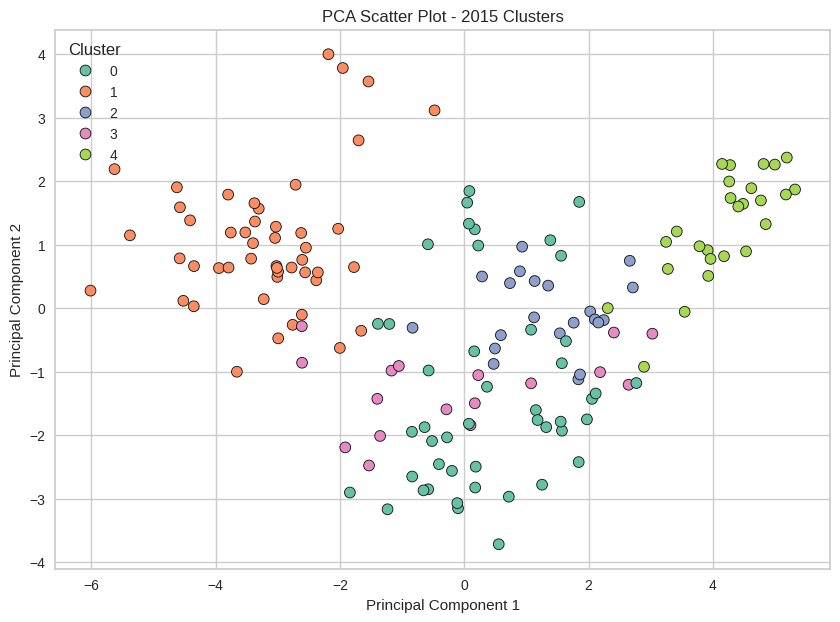

In [327]:
# PCA Scatter Plot for 2015 Dataset
plot_pca_clusters(df_2015_scaled, df_2015['Cluster'], "PCA Scatter Plot - 2015 Clusters")

1. 2015 PCA Plot
- 5 clusters are fairly well-separated but some overlaps are visible.

- Some clusters (Cluster 1 and 2) have countries closer to each other.

- Overall larger, broader clusters — not highly compact.

- - This matches with Elbow and Silhouette analysis earlier: moderate cluster quality.

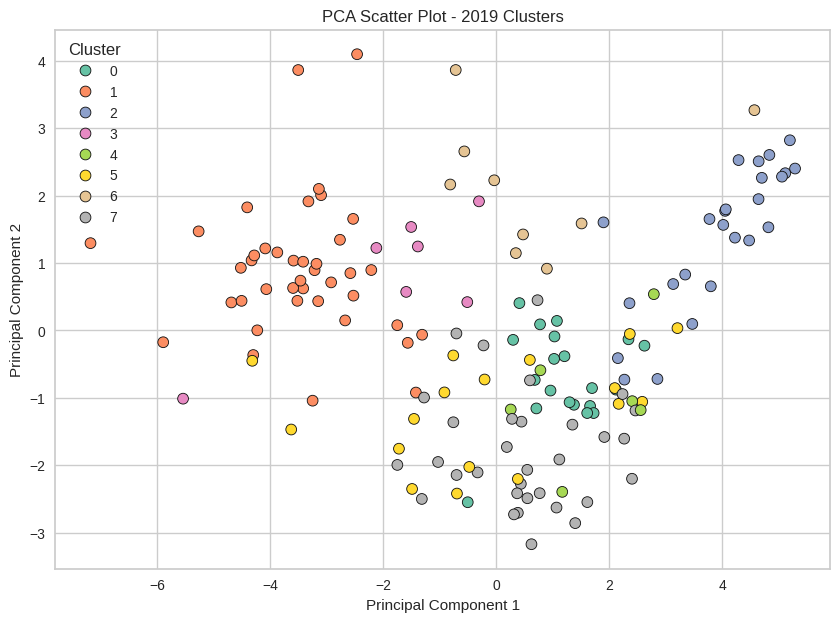

In [328]:
# 2. PCA Scatter Plot for 2019 Dataset
plot_pca_clusters(df_2019_scaled, df_2019['Cluster'], "PCA Scatter Plot - 2019 Clusters")

2. 2019 PCA Plot
- 8 clusters: a few very tight and small clusters.

- More fragmentation — countries grouped into smaller, tighter groups.

- Separation looks stronger for some clusters.

- This matches what we saw: more fragmentation over time → matches model drift findings!

PCA scatter plots of the 2015 and 2019 clusterings reveal a trend of cluster fragmentation over time, with 2019 displaying tighter and more numerous clusters compared to 2015.
This visual evidence supports earlier model drift findings and the formation of new cluster structures.

## Analysis

In [330]:
features = [
    'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
    'Economic_Health_Index', 'Social_Economic_Index', 'Freedom_Trust_Index'
]

# Cluster Profiling for 2015
cluster_profile_2015 = df_2015.groupby('Cluster')[features].mean().round(2)

# Cluster Profiling for 2019
cluster_profile_2019 = df_2019.groupby('Cluster')[features].mean().round(2)

In [331]:
# Display
print("\n=== Cluster Profiles for 2015 ===")
cluster_profile_2015


=== Cluster Profiles for 2015 ===


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Economic_Health_Index,Social_Economic_Index,Freedom_Trust_Index
Cluster,,,,,,,,,,
0,5.38,0.97,1.06,0.74,0.40,0.20,0.08,0.85,1.01,0.24
1,4.22,0.38,0.76,0.31,0.37,0.25,0.13,0.35,0.57,0.25
2,6.22,0.91,1.12,0.72,0.51,0.21,0.11,0.81,1.01,0.31
3,5.16,0.99,0.89,0.69,0.31,0.18,0.14,0.84,0.94,0.23
4,6.95,1.35,1.25,0.90,0.61,0.34,0.31,1.13,1.30,0.46


In [333]:
print("\n=== Cluster Profiles for 2019 ===")
cluster_profile_2019


=== Cluster Profiles for 2019 ===


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Economic_Health_Index,Social_Economic_Index,Freedom_Trust_Index
Cluster,,,,,,,,,,
0,6.07,0.95,1.37,0.83,0.46,0.13,0.07,0.89,1.16,0.27
1,4.24,0.42,0.90,0.40,0.33,0.19,0.10,0.41,0.66,0.21
2,6.96,1.35,1.49,0.99,0.53,0.25,0.24,1.17,1.42,0.38
3,4.53,0.65,0.99,0.62,0.39,0.23,0.09,0.63,0.82,0.24
4,5.69,1.24,1.33,0.95,0.37,0.17,0.12,1.09,1.28,0.25
5,5.18,1.06,1.13,0.75,0.31,0.15,0.10,0.90,1.10,0.20
6,5.27,0.93,1.25,0.75,0.54,0.30,0.12,0.84,1.09,0.33
7,5.54,1.03,1.33,0.82,0.34,0.13,0.05,0.93,1.18,0.20


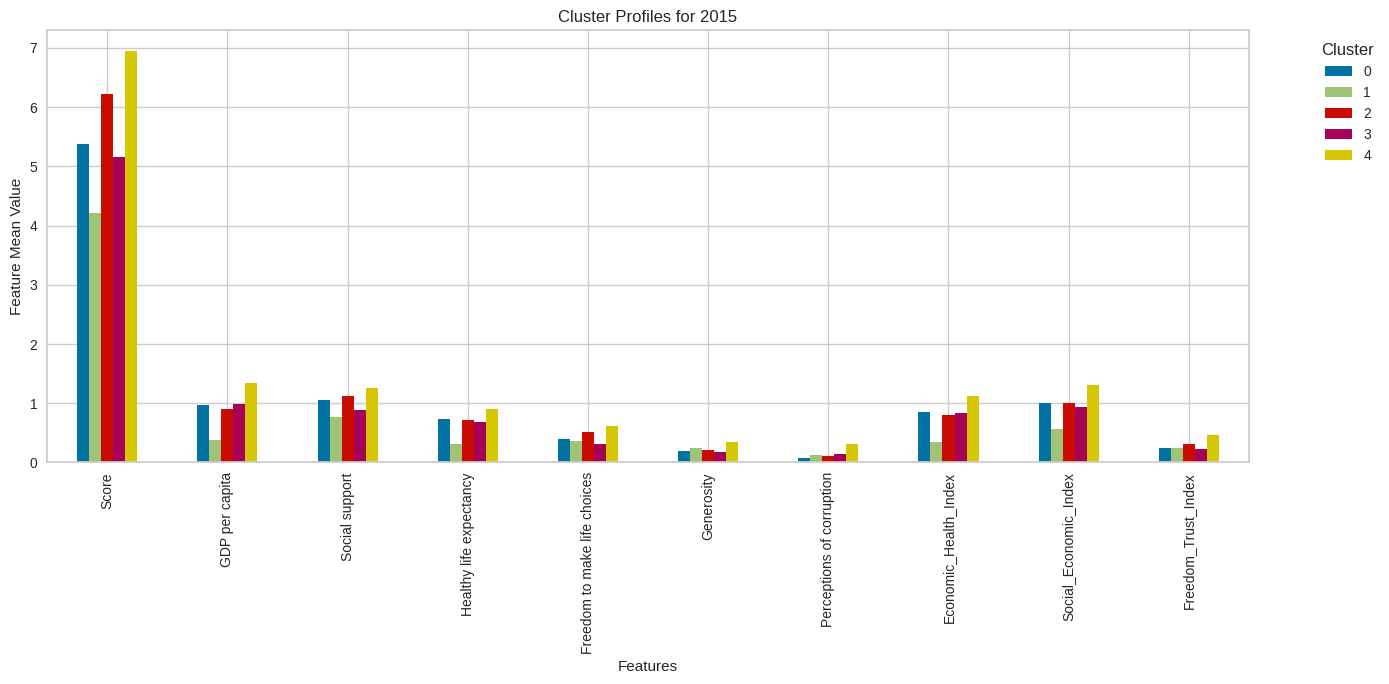

In [335]:
# Plot cluster profiling for 2015
cluster_profile_2015.T.plot(kind='bar', figsize=(14, 7))
plt.title("Cluster Profiles for 2015")
plt.ylabel("Feature Mean Value")
plt.xlabel("Features")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

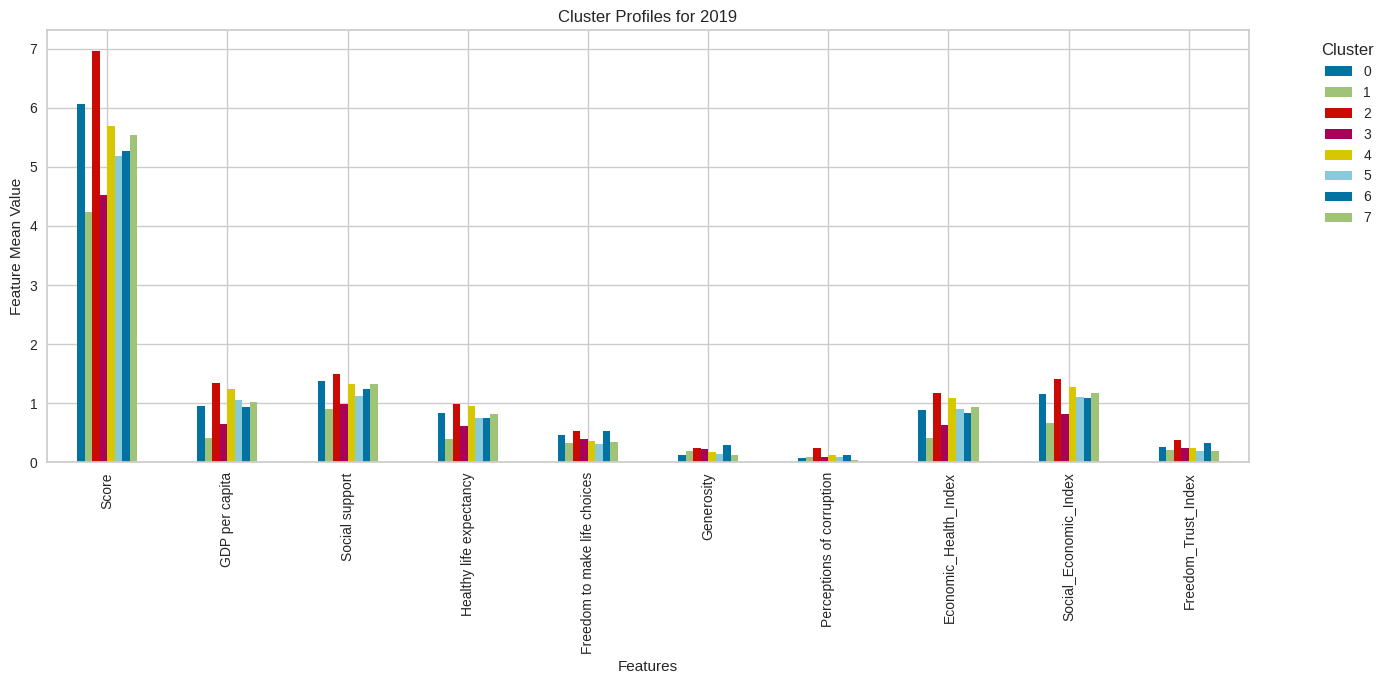

In [336]:
# Plot cluster profiling for 2019
cluster_profile_2019.T.plot(kind='bar', figsize=(14, 7))
plt.title("Cluster Profiles for 2019")
plt.ylabel("Feature Mean Value")
plt.xlabel("Features")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()